In [1]:
from tensorflow import keras as kr
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
train_path = "C:/Users/Tri's pc/dataset/train"
test_path = "C:/Users/Tri's pc/dataset/test"
val_path = "C:/Users/Tri's pc/dataset/valid"

In [3]:
cards = os.listdir(train_path)
print(cards)

['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [4]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale= 1.0/255
)

def image_data(path):
    set_generator = datagen.flow_from_directory(
        directory= path,
        target_size= (250 , 250),
        class_mode = 'categorical',
        color_mode = 'grayscale',
        batch_size= 10000
    )
    return set_generator

In [5]:
train_generator = image_data(train_path)
test_generator = image_data(test_path)
valid_generator = image_data(val_path)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [6]:
X_train , Y_train = train_generator.next()
X_test  , Y_test = test_generator.next()
X_val , Y_val = valid_generator.next()

In [7]:
print(X_test.shape , Y_test.shape)

(265, 250, 250, 1) (265, 53)


In [8]:
Y_train = np.array([np.argmax(i) for i in Y_train])
Y_test = np.array([np.argmax(i) for i in Y_test])
Y_val = np.array([np.argmax(i) for i in Y_val])

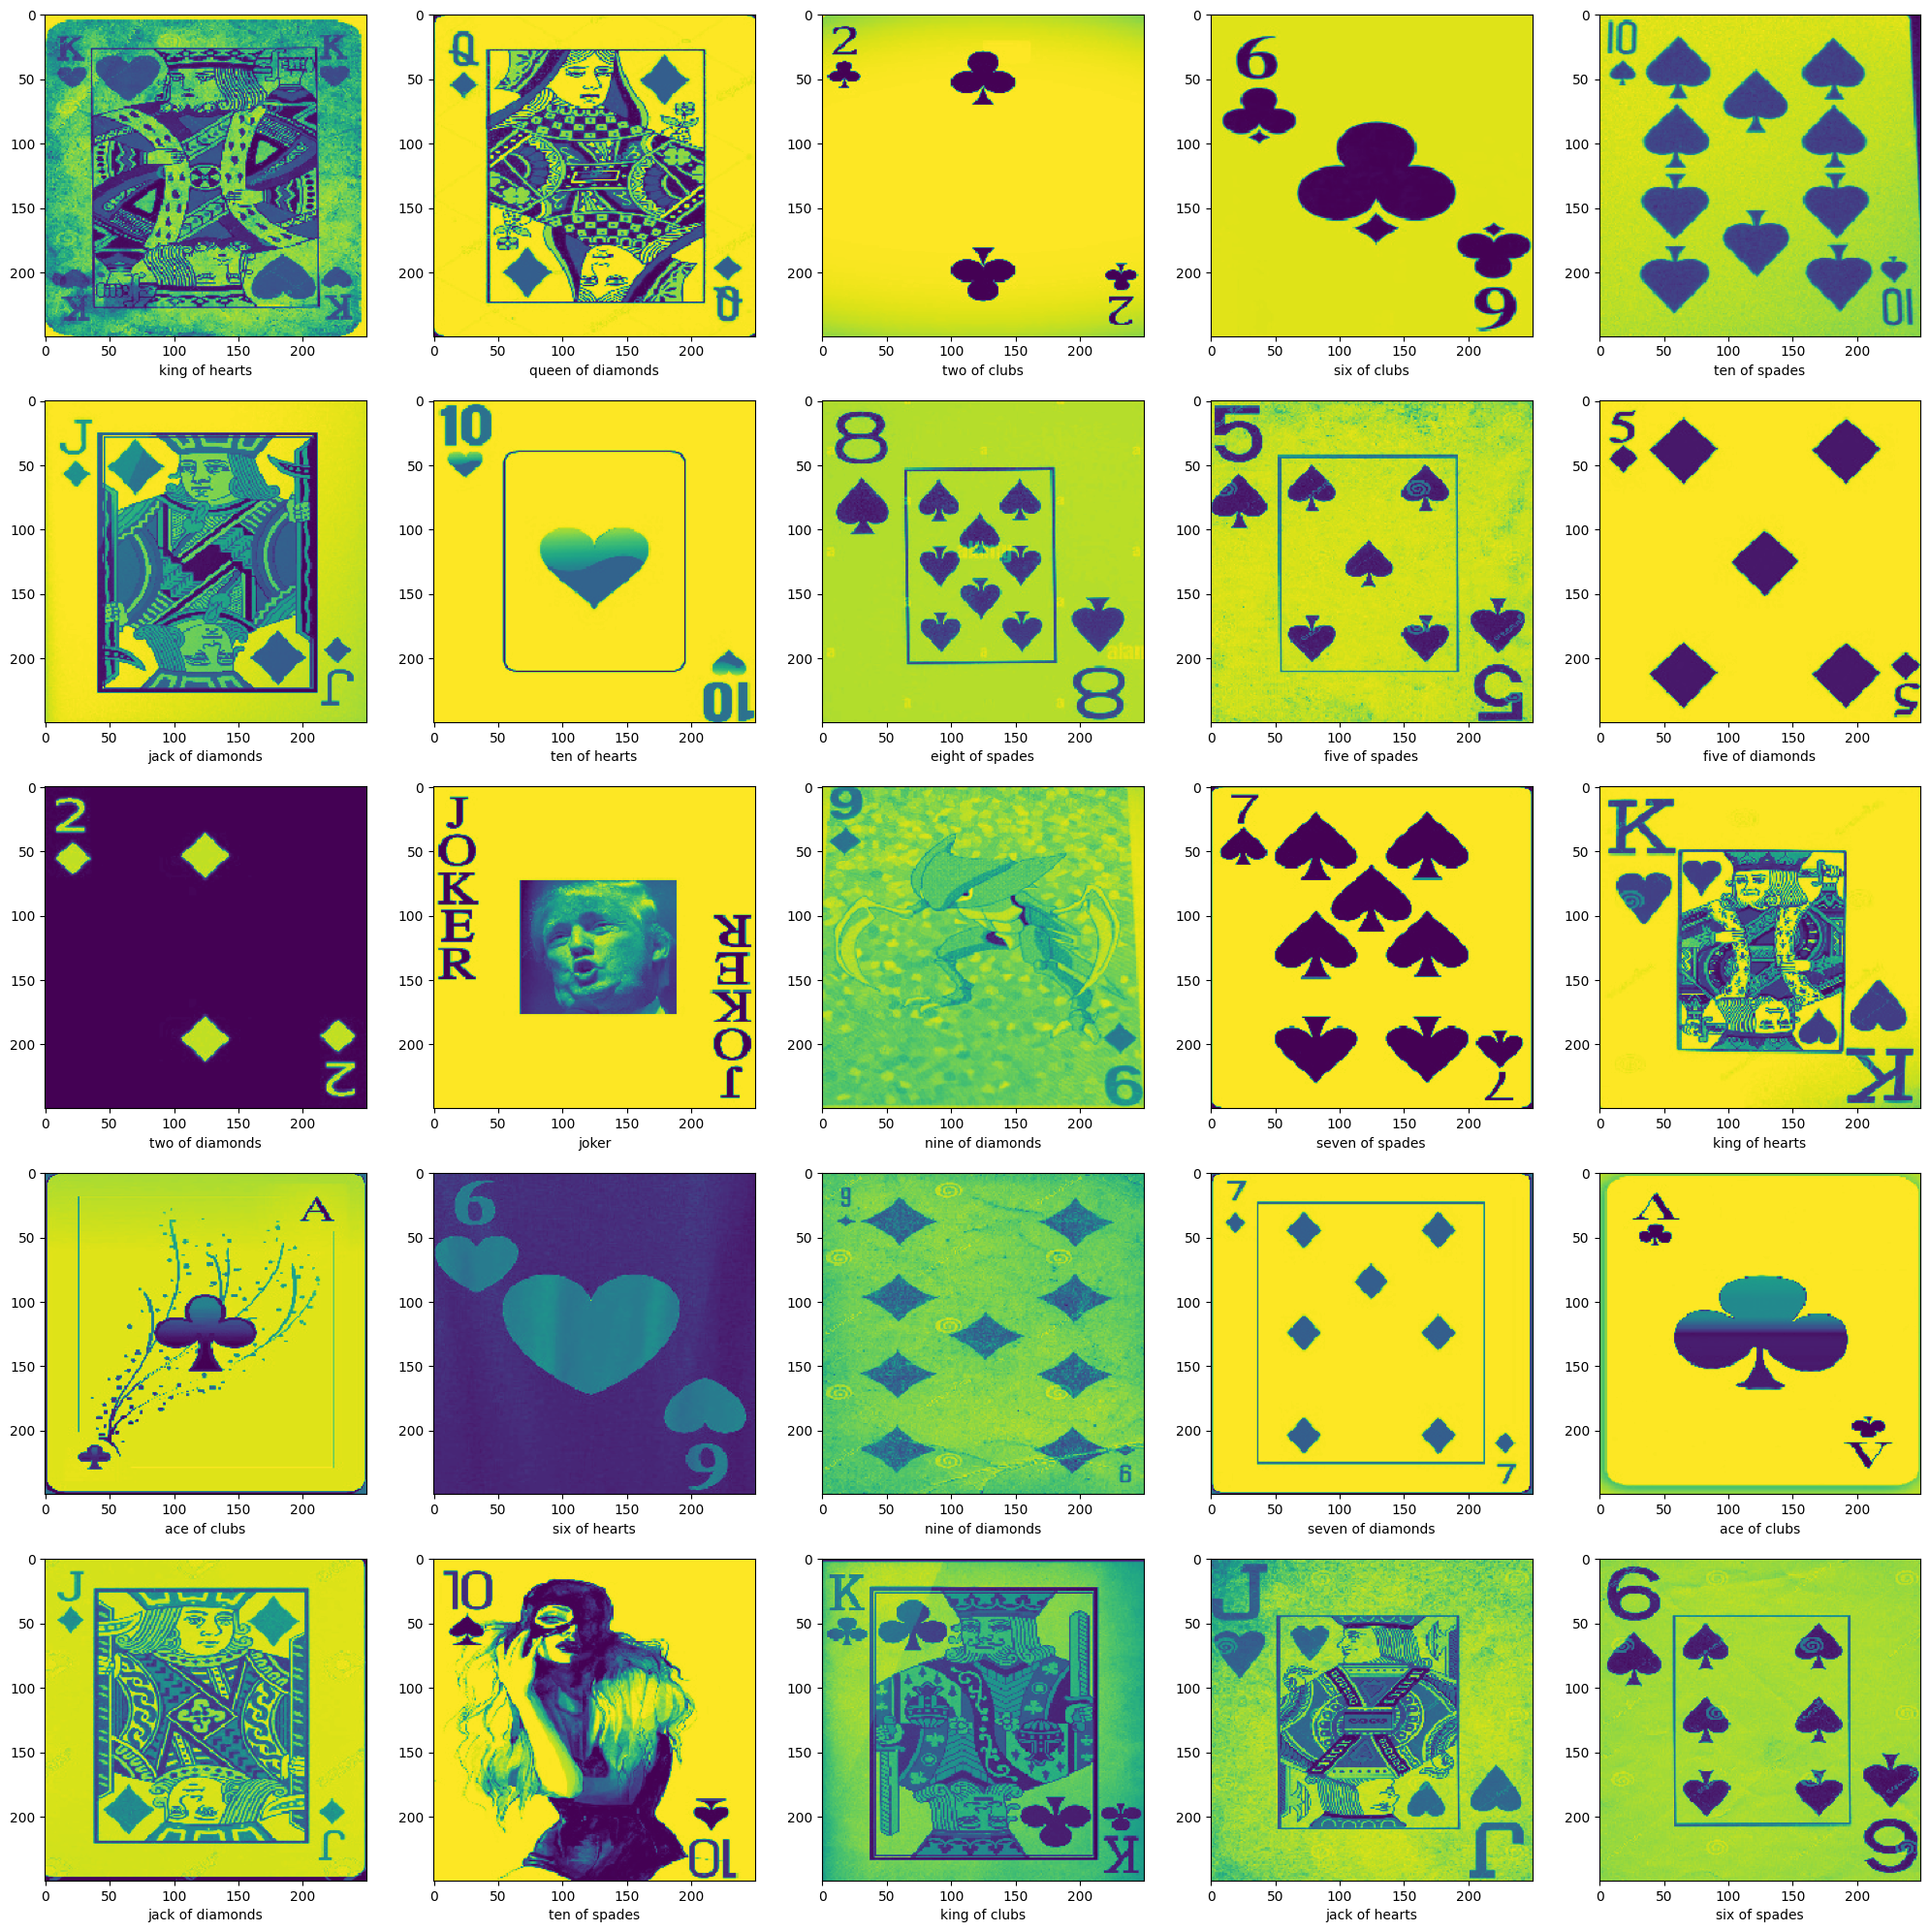

In [9]:
plt.figure(figsize= (25 , 25))
for i in range(25):
    plt.subplot(5 , 5 , i+1)
    plt.imshow(X_test[i])
    plt.xlabel(cards[Y_test[i]])

In [10]:
model = kr.Sequential([
    kr.layers.Conv2D(filters = 16 , kernel_size=(3,3) , activation= 'relu', input_shape = (250 , 250 , 1)),
    kr.layers.MaxPool2D(pool_size= (2 , 2)),
    kr.layers.Conv2D(filters = 32 , kernel_size=(3,3) , activation= 'relu'),
    kr.layers.MaxPool2D(pool_size= (2 , 2)),
    kr.layers.Conv2D(filters = 64 , kernel_size=(3,3) , activation= 'relu'),
    kr.layers.MaxPool2D(pool_size= (2 , 2)),
    kr.layers.Conv2D(filters = 128 , kernel_size=(3,3) , activation= 'relu'),
    kr.layers.MaxPool2D(pool_size= (2 , 2)),
    kr.layers.Conv2D(filters = 256 , kernel_size=(3,3) , activation= 'relu'),
    kr.layers.MaxPool2D(pool_size= (2 , 2)),
    kr.layers.Flatten(),
    kr.layers.Dense(256 , activation= 'relu'),
    kr.layers.Dropout(0.2),
    kr.layers.Dense(128 , activation= 'relu'),
    kr.layers.Dropout(0.2),
    kr.layers.Dense(64 , activation= 'relu'),
    kr.layers.Dense(53 , activation= 'softmax'),
])

In [11]:
model_path = "C:/Users/Tri's pc/dataset/best_model"
early_stopping =kr.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = kr.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max' , verbose = 0)
callbacks_list = [early_stopping , checkpoint]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 64)        0

In [13]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [14]:
model.fit(X_train , Y_train , epochs = 15 , validation_data=(X_val , Y_val) , callbacks= callbacks_list)

Epoch 1/15
239/239 [==============================] - ETA: 0s - loss: 3.5436 - accuracy: 0.1083INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


239/239 [==============================] - 193s 802ms/step - loss: 3.5436 - accuracy: 0.1083 - val_loss: 2.3928 - val_accuracy: 0.2642
Epoch 2/15
239/239 [==============================] - ETA: 0s - loss: 2.2662 - accuracy: 0.3558INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


239/239 [==============================] - 207s 867ms/step - loss: 2.2662 - accuracy: 0.3558 - val_loss: 1.2862 - val_accuracy: 0.6377
Epoch 3/15
239/239 [==============================] - ETA: 0s - loss: 1.6382 - accuracy: 0.5487INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


239/239 [==============================] - 209s 874ms/step - loss: 1.6382 - accuracy: 0.5487 - val_loss: 0.8952 - val_accuracy: 0.7698
Epoch 4/15
239/239 [==============================] - 215s 902ms/step - loss: 1.3182 - accuracy: 0.6271 - val_loss: 0.7714 - val_accuracy: 0.7660
Epoch 5/15
239/239 [==============================] - ETA: 0s - loss: 1.1050 - accuracy: 0.6813INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


239/239 [==============================] - 216s 905ms/step - loss: 1.1050 - accuracy: 0.6813 - val_loss: 0.6769 - val_accuracy: 0.8302
Epoch 6/15
239/239 [==============================] - ETA: 0s - loss: 0.9464 - accuracy: 0.7213INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


239/239 [==============================] - 206s 862ms/step - loss: 0.9464 - accuracy: 0.7213 - val_loss: 0.5976 - val_accuracy: 0.8377
Epoch 7/15
239/239 [==============================] - ETA: 0s - loss: 0.8024 - accuracy: 0.7570INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


239/239 [==============================] - 208s 870ms/step - loss: 0.8024 - accuracy: 0.7570 - val_loss: 0.5611 - val_accuracy: 0.8528
Epoch 8/15
239/239 [==============================] - 204s 854ms/step - loss: 0.7063 - accuracy: 0.7896 - val_loss: 0.5980 - val_accuracy: 0.8453
Epoch 9/15
239/239 [==============================] - 204s 853ms/step - loss: 0.5866 - accuracy: 0.8189 - val_loss: 0.5870 - val_accuracy: 0.8491
Epoch 10/15
239/239 [==============================] - 208s 870ms/step - loss: 0.5065 - accuracy: 0.8433 - val_loss: 0.6003 - val_accuracy: 0.8528
Epoch 11/15
239/239 [==============================] - 220s 921ms/step - loss: 0.4444 - accuracy: 0.8603 - val_loss: 0.5713 - val_accuracy: 0.8453
Epoch 12/15
239/239 [==============================] - ETA: 0s - loss: 0.3734 - accuracy: 0.8860INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tri's pc/dataset\best_model\assets


239/239 [==============================] - 252s 1s/step - loss: 0.3734 - accuracy: 0.8860 - val_loss: 0.5668 - val_accuracy: 0.8792


In [15]:
model = kr.models.load_model(model_path)

In [16]:
model.evaluate(X_test , Y_test)

9/9 [==============================] - 2s 245ms/step - loss: 0.8809 - accuracy: 0.8415


[0.8809157013893127, 0.8415094614028931]

In [ ]:
result = []
for i in range(5):
    beg = np.random.randint(7625)
    end = np.random.randint(beg , 7625)
    loss , accuracy = model.evaluate(X_train[beg : end] , Y_train[beg : end])
    result.append(accuracy)

print(np.array(result).mean())

 68/139 [=============>................] - ETA: 17s - loss: 0.1369 - accuracy: 0.9669